train loss: 6.10e+00 | test loss: 6.16e+00 | reg: 3.73e+02 : 100%|██| 10/10 [00:00<00:00, 45.87it/s]


features=32,grid=10,depth=2 class=<class 'kan.KAN.KAN'>,time=0.33345770835876465,time_per_step=0.03334577083587646


train loss: 3.31e+00 | test loss: 7.95e+00 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 174.62it/s]


features=32,grid=10,depth=2 class=<class 'better_kan.KAN.KAN'>,time=0.06028008460998535,time_per_step=0.006028008460998535
features=32,grid=10,depth=2 time scale=5.531805579176769


train loss: 9.92e+00 | test loss: 1.01e+01 | reg: 1.38e+03 : 100%|██| 10/10 [00:00<00:00, 96.95it/s]


features=64,grid=10,depth=2 class=<class 'kan.KAN.KAN'>,time=0.17603015899658203,time_per_step=0.017603015899658202


train loss: 7.55e+00 | test loss: 1.05e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 189.33it/s]


features=64,grid=10,depth=2 class=<class 'better_kan.KAN.KAN'>,time=0.06549930572509766,time_per_step=0.006549930572509766
features=64,grid=10,depth=2 time scale=2.6768424220231384


train loss: 1.77e+01 | test loss: 2.00e+01 | reg: 5.31e+03 : 100%|██| 10/10 [00:00<00:00, 81.71it/s]


features=128,grid=10,depth=2 class=<class 'kan.KAN.KAN'>,time=0.397153377532959,time_per_step=0.0397153377532959


train loss: 1.51e+01 | test loss: 2.49e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 148.55it/s]


features=128,grid=10,depth=2 class=<class 'better_kan.KAN.KAN'>,time=0.06897759437561035,time_per_step=0.006897759437561035
features=128,grid=10,depth=2 time scale=5.757715692001397


train loss: 7.77e+00 | test loss: 1.83e+00 | reg: 5.82e+03 : 100%|██| 10/10 [00:00<00:00, 52.54it/s]


features=32,grid=10,depth=3 class=<class 'kan.KAN.KAN'>,time=0.22656512260437012,time_per_step=0.022656512260437012


train loss: 4.88e+00 | test loss: 5.25e+00 | reg: 0.00e+00 : 100%|██| 10/10 [00:00<00:00, 84.83it/s]


features=32,grid=10,depth=3 class=<class 'better_kan.KAN.KAN'>,time=0.19694781303405762,time_per_step=0.01969478130340576
features=32,grid=10,depth=3 time scale=1.150381510279532


train loss: 8.00e+01 | test loss: 1.90e+02 | reg: 2.07e+04 : 100%|██| 10/10 [00:00<00:00, 52.27it/s]


features=64,grid=10,depth=3 class=<class 'kan.KAN.KAN'>,time=0.33296942710876465,time_per_step=0.033296942710876465


train loss: 1.06e+01 | test loss: 1.37e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 119.44it/s]


features=64,grid=10,depth=3 class=<class 'better_kan.KAN.KAN'>,time=0.09016203880310059,time_per_step=0.009016203880310058
features=64,grid=10,depth=3 time scale=3.6930112886634743


train loss: 1.61e+03 | test loss: 2.68e+02 | reg: 1.73e+05 : 100%|██| 10/10 [00:00<00:00, 39.55it/s]


features=128,grid=10,depth=3 class=<class 'kan.KAN.KAN'>,time=0.7457330226898193,time_per_step=0.07457330226898193


train loss: 1.70e+01 | test loss: 1.98e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 120.24it/s]


features=128,grid=10,depth=3 class=<class 'better_kan.KAN.KAN'>,time=0.08973574638366699,time_per_step=0.0089735746383667
features=128,grid=10,depth=3 time scale=8.310322839478292


train loss: 4.54e+00 | test loss: 4.58e+00 | reg: 8.01e+03 : 100%|██| 10/10 [00:00<00:00, 37.37it/s]


features=32,grid=10,depth=4 class=<class 'kan.KAN.KAN'>,time=0.3267683982849121,time_per_step=0.03267683982849121


train loss: 1.30e+01 | test loss: 8.29e+00 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 102.70it/s]


features=32,grid=10,depth=4 class=<class 'better_kan.KAN.KAN'>,time=0.1024622917175293,time_per_step=0.01024622917175293
features=32,grid=10,depth=4 time scale=3.189157618939031


train loss: nan | test loss: nan | reg: nan : 100%|█████████████████| 10/10 [00:00<00:00, 32.22it/s]


features=64,grid=10,depth=4 class=<class 'kan.KAN.KAN'>,time=0.5684337615966797,time_per_step=0.05684337615966797


train loss: 1.50e+01 | test loss: 1.12e+01 | reg: 0.00e+00 : 100%|██| 10/10 [00:00<00:00, 66.09it/s]


features=64,grid=10,depth=4 class=<class 'better_kan.KAN.KAN'>,time=0.15965676307678223,time_per_step=0.01596567630767822
features=64,grid=10,depth=4 time scale=3.5603487797338604


train loss: 9.51e+04 | test loss: 2.72e+04 | reg: 7.37e+06 : 100%|██| 10/10 [00:00<00:00, 29.48it/s]


features=128,grid=10,depth=4 class=<class 'kan.KAN.KAN'>,time=1.0586459636688232,time_per_step=0.10586459636688232


train loss: 8.99e+00 | test loss: 3.16e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 103.45it/s]


features=128,grid=10,depth=4 class=<class 'better_kan.KAN.KAN'>,time=0.19913315773010254,time_per_step=0.019913315773010254
features=128,grid=10,depth=4 time scale=5.316271663324254


train loss: 6.42e+00 | test loss: 5.00e+00 | reg: 3.38e+02 : 100%|██| 10/10 [00:00<00:00, 87.85it/s]


features=32,grid=20,depth=2 class=<class 'kan.KAN.KAN'>,time=0.1452198028564453,time_per_step=0.014521980285644531


train loss: 3.86e+00 | test loss: 3.60e+00 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 203.42it/s]


features=32,grid=20,depth=2 class=<class 'better_kan.KAN.KAN'>,time=0.05365490913391113,time_per_step=0.005365490913391113
features=32,grid=20,depth=2 time scale=2.7065520229287476


train loss: 1.07e+01 | test loss: 7.74e+00 | reg: 1.20e+03 : 100%|██| 10/10 [00:00<00:00, 93.60it/s]


features=64,grid=20,depth=2 class=<class 'kan.KAN.KAN'>,time=0.19064545631408691,time_per_step=0.01906454563140869


train loss: 1.43e+01 | test loss: 3.25e+00 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 174.19it/s]


features=64,grid=20,depth=2 class=<class 'better_kan.KAN.KAN'>,time=0.05942845344543457,time_per_step=0.005942845344543457
features=64,grid=20,depth=2 time scale=3.2079827971483708


train loss: 1.87e+01 | test loss: 1.63e+01 | reg: 5.33e+03 : 100%|██| 10/10 [00:00<00:00, 71.58it/s]


features=128,grid=20,depth=2 class=<class 'kan.KAN.KAN'>,time=0.4633805751800537,time_per_step=0.04633805751800537


train loss: 2.90e+01 | test loss: 1.15e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 182.48it/s]


features=128,grid=20,depth=2 class=<class 'better_kan.KAN.KAN'>,time=0.06716251373291016,time_per_step=0.006716251373291016
features=128,grid=20,depth=2 time scale=6.899392971246006


train loss: 4.43e+00 | test loss: 1.02e+02 | reg: 6.28e+03 : 100%|██| 10/10 [00:00<00:00, 45.20it/s]


features=32,grid=20,depth=3 class=<class 'kan.KAN.KAN'>,time=0.296222448348999,time_per_step=0.0296222448348999


train loss: 1.37e+01 | test loss: 8.63e+00 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 136.01it/s]


features=32,grid=20,depth=3 class=<class 'better_kan.KAN.KAN'>,time=0.07907319068908691,time_per_step=0.00790731906890869
features=32,grid=20,depth=3 time scale=3.7447362787458127


train loss: 2.77e+02 | test loss: 1.12e+02 | reg: 2.80e+04 : 100%|██| 10/10 [00:00<00:00, 50.02it/s]


features=64,grid=20,depth=3 class=<class 'kan.KAN.KAN'>,time=0.36379408836364746,time_per_step=0.03637940883636474


train loss: 8.22e+00 | test loss: 2.09e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 137.25it/s]


features=64,grid=20,depth=3 class=<class 'better_kan.KAN.KAN'>,time=0.07564949989318848,time_per_step=0.007564949989318848
features=64,grid=20,depth=3 time scale=4.808942410423042


train loss: 7.94e+02 | test loss: 4.87e+02 | reg: 1.71e+05 : 100%|██| 10/10 [00:00<00:00, 33.75it/s]


features=128,grid=20,depth=3 class=<class 'kan.KAN.KAN'>,time=1.000413417816162,time_per_step=0.10004134178161621


train loss: 1.97e+01 | test loss: 2.39e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 127.32it/s]


features=128,grid=20,depth=3 class=<class 'better_kan.KAN.KAN'>,time=0.08358287811279297,time_per_step=0.008358287811279296
features=128,grid=20,depth=3 time scale=11.969119039740766


train loss: 4.28e+00 | test loss: 1.18e+00 | reg: 1.29e+04 : 100%|██| 10/10 [00:00<00:00, 39.77it/s]


features=32,grid=20,depth=4 class=<class 'kan.KAN.KAN'>,time=0.3215010166168213,time_per_step=0.032150101661682126


train loss: 1.44e+01 | test loss: 1.15e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 115.33it/s]


features=32,grid=20,depth=4 class=<class 'better_kan.KAN.KAN'>,time=0.09310483932495117,time_per_step=0.009310483932495117
features=32,grid=20,depth=4 time scale=3.453107474840593


train loss: 5.79e+02 | test loss: 4.16e+02 | reg: 2.12e+05 : 100%|██| 10/10 [00:00<00:00, 30.16it/s]


features=64,grid=20,depth=4 class=<class 'kan.KAN.KAN'>,time=0.5744378566741943,time_per_step=0.057443785667419436


train loss: 1.83e+01 | test loss: 1.51e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 109.99it/s]


features=64,grid=20,depth=4 class=<class 'better_kan.KAN.KAN'>,time=0.1641535758972168,time_per_step=0.01641535758972168
features=64,grid=20,depth=4 time scale=3.4993928918969948


train loss: nan | test loss: nan | reg: nan : 100%|█████████████████| 10/10 [00:00<00:00, 22.99it/s]


features=128,grid=20,depth=4 class=<class 'kan.KAN.KAN'>,time=1.370499610900879,time_per_step=0.13704996109008788


train loss: 2.14e+01 | test loss: 2.45e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 118.61it/s]


features=128,grid=20,depth=4 class=<class 'better_kan.KAN.KAN'>,time=0.18187642097473145,time_per_step=0.018187642097473145
features=128,grid=20,depth=4 time scale=7.5353341766676065


train loss: 7.13e+00 | test loss: 4.46e+00 | reg: 2.90e+02 : 100%|█| 10/10 [00:00<00:00, 100.13it/s]


features=32,grid=50,depth=2 class=<class 'kan.KAN.KAN'>,time=0.7595579624176025,time_per_step=0.07595579624176026


train loss: 7.19e+00 | test loss: 9.97e+00 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 179.25it/s]


features=32,grid=50,depth=2 class=<class 'better_kan.KAN.KAN'>,time=0.058893680572509766,time_per_step=0.005889368057250976
features=32,grid=50,depth=2 time scale=12.897104664437409


train loss: 1.36e+01 | test loss: 7.21e+00 | reg: 1.31e+03 : 100%|██| 10/10 [00:00<00:00, 73.32it/s]


features=64,grid=50,depth=2 class=<class 'kan.KAN.KAN'>,time=2.842250347137451,time_per_step=0.2842250347137451


train loss: 2.05e+01 | test loss: 2.50e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 114.06it/s]


features=64,grid=50,depth=2 class=<class 'better_kan.KAN.KAN'>,time=0.09807991981506348,time_per_step=0.009807991981506347
features=64,grid=50,depth=2 time scale=28.97892201071037


train loss: 3.08e+01 | test loss: 1.50e+01 | reg: 8.85e+03 : 100%|██| 10/10 [00:00<00:00, 48.02it/s]


features=128,grid=50,depth=2 class=<class 'kan.KAN.KAN'>,time=10.705899238586426,time_per_step=1.0705899238586425


train loss: 4.23e+01 | test loss: 2.82e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 164.78it/s]


features=128,grid=50,depth=2 class=<class 'better_kan.KAN.KAN'>,time=0.06587433815002441,time_per_step=0.006587433815002442
features=128,grid=50,depth=2 time scale=162.5200273618606


train loss: 1.29e+02 | test loss: 1.90e+02 | reg: 1.32e+04 : 100%|██| 10/10 [00:00<00:00, 56.31it/s]


features=32,grid=50,depth=3 class=<class 'kan.KAN.KAN'>,time=1.4842112064361572,time_per_step=0.14842112064361573


train loss: 5.97e+00 | test loss: 6.76e+00 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 112.59it/s]


features=32,grid=50,depth=3 class=<class 'better_kan.KAN.KAN'>,time=0.09494495391845703,time_per_step=0.009494495391845704
features=32,grid=50,depth=3 time scale=15.632333738461384


train loss: 1.85e+02 | test loss: 1.51e+02 | reg: 2.97e+04 : 100%|██| 10/10 [00:00<00:00, 37.39it/s]


features=64,grid=50,depth=3 class=<class 'kan.KAN.KAN'>,time=5.785891771316528,time_per_step=0.5785891771316528


train loss: 1.30e+01 | test loss: 1.32e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 133.14it/s]


features=64,grid=50,depth=3 class=<class 'better_kan.KAN.KAN'>,time=0.08002066612243652,time_per_step=0.008002066612243652
features=64,grid=50,depth=3 time scale=70.70004078659869


train loss: 7.13e+02 | test loss: 4.00e+02 | reg: 1.17e+05 : 100%|██| 10/10 [00:00<00:00, 19.53it/s]


features=128,grid=50,depth=3 class=<class 'kan.KAN.KAN'>,time=24.169023513793945,time_per_step=2.4169023513793944


train loss: 2.42e+01 | test loss: 2.10e+01 | reg: 0.00e+00 : 100%|██| 10/10 [00:00<00:00, 97.23it/s]


features=128,grid=50,depth=3 class=<class 'better_kan.KAN.KAN'>,time=0.12096834182739258,time_per_step=0.012096834182739259
features=128,grid=50,depth=3 time scale=199.7962702363918


train loss: nan | test loss: nan | reg: nan : 100%|█████████████████| 10/10 [00:00<00:00, 39.05it/s]


features=32,grid=50,depth=4 class=<class 'kan.KAN.KAN'>,time=2.37726092338562,time_per_step=0.237726092338562


train loss: 1.53e+01 | test loss: 1.13e+01 | reg: 0.00e+00 : 100%|██| 10/10 [00:00<00:00, 96.12it/s]


features=32,grid=50,depth=4 class=<class 'better_kan.KAN.KAN'>,time=0.11248564720153809,time_per_step=0.011248564720153809
features=32,grid=50,depth=4 time scale=21.13390448050971


train loss: 4.31e+01 | test loss: 1.32e+00 | reg: 2.96e+05 : 100%|██| 10/10 [00:00<00:00, 30.34it/s]


features=64,grid=50,depth=4 class=<class 'kan.KAN.KAN'>,time=9.335275411605835,time_per_step=0.9335275411605835


train loss: 3.11e+01 | test loss: 2.71e+01 | reg: 0.00e+00 : 100%|██| 10/10 [00:00<00:00, 92.78it/s]


features=64,grid=50,depth=4 class=<class 'better_kan.KAN.KAN'>,time=0.1167595386505127,time_per_step=0.01167595386505127
features=64,grid=50,depth=4 time scale=79.95300015314717


train loss: 2.71e+00 | test loss: nan | reg: nan : 100%|████████████| 10/10 [00:00<00:00, 12.80it/s]


features=128,grid=50,depth=4 class=<class 'kan.KAN.KAN'>,time=37.293084383010864,time_per_step=3.7293084383010866


train loss: 2.87e+01 | test loss: 1.46e+01 | reg: 0.00e+00 : 100%|█| 10/10 [00:00<00:00, 100.60it/s]


features=128,grid=50,depth=4 class=<class 'better_kan.KAN.KAN'>,time=0.11920428276062012,time_per_step=0.011920428276062012
features=128,grid=50,depth=4 time scale=312.85020570863975


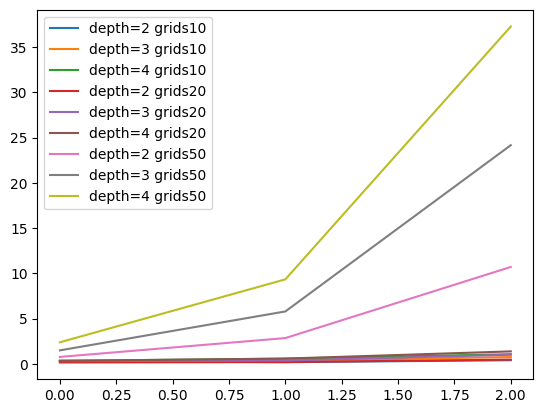

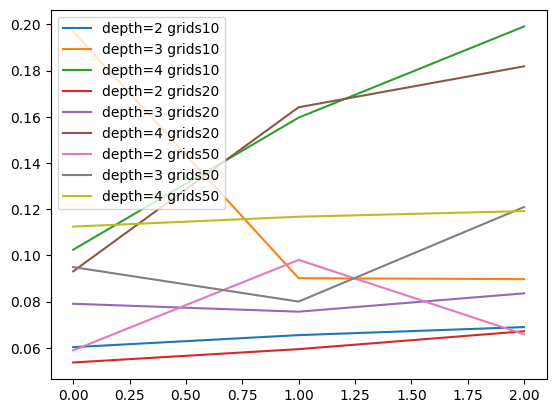

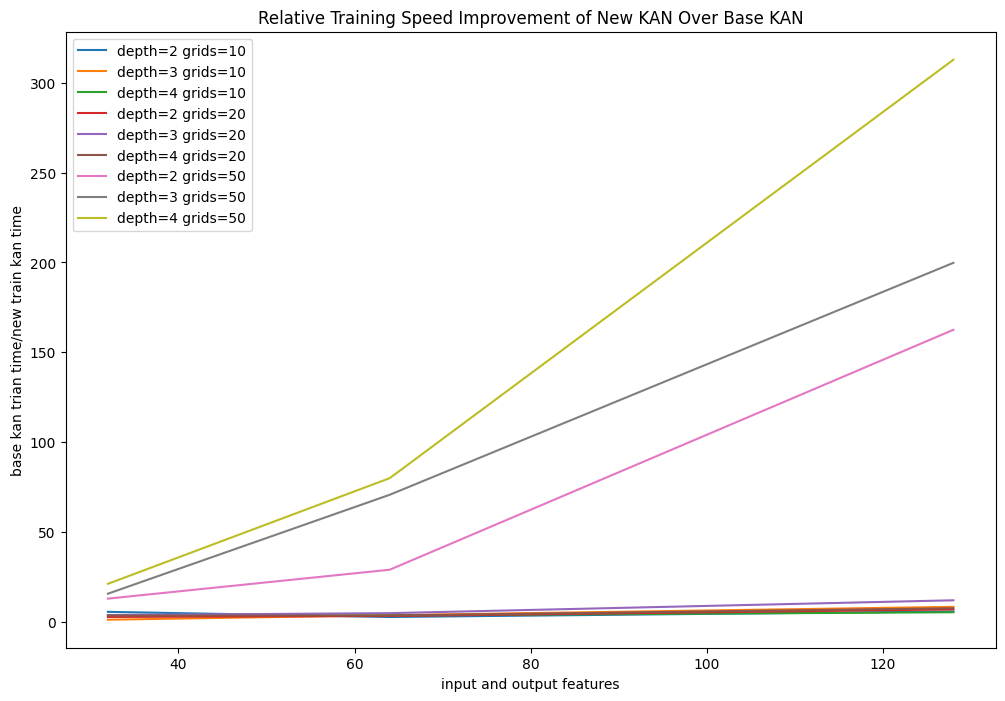

In [1]:
from kan import KAN as BaseKAN
from kan import  create_dataset

from better_kan import KAN as BetterKAN

import torch
import time
device='cuda' if torch.cuda.is_available() else 'cpu'
n=10
steps=10
base_kan_time=dict()
better_kan_time=dict()
time_scales=dict()
depths=[2,3,4]
features_list=[32,64,128]
for grid in [10,20,50]:
    
   
    
    for depth in depths:
        base_kan_t=[]
        base_kan_time[f"depth={depth} grids{grid}"]=base_kan_t
        better_kan_t=[]
        better_kan_time[f"depth={depth} grids{grid}"]=better_kan_t
        time_scale=[]
        time_scales[f"depth={depth} grids={grid}"]=time_scale
        for features in features_list:
            
            dataset=create_dataset(f=lambda x:x,n_var=features,train_num=n,test_num=n,device=device)
        # for kan in [BaseKAN, BetterKAN]:
           
            try :
                t=time.time()
                base_kan=BaseKAN(width=[features]*depth,grid=grid,device=device,symbolic_enabled=False)
                base_kan.train(dataset,opt="Adam",steps=steps,device=device,update_grid=False)
                base_time=time.time()-t
                base_kan_t.append(time.time()-t)
                print(f"features={features},grid={grid},depth={depth} class={BaseKAN},time={time.time()-t},time_per_step={(time.time()-t)/steps}")
                
            except Exception as e:
                print(f"features={features},grid={grid},depth={depth} class={BaseKAN},error={e}")
                base_kan_t.append(float('nan'))
                base_time=float('nan')
                
            try:
                    
                t=time.time()
                better_kan=BetterKAN(width=[features]*depth,num_basis=grid,device=device,symbolic_enabled=False).to(device)
                better_kan.train(dataset,opt="Adam",steps=steps,update_grid=False)
                better_kan_t.append(time.time()-t)
                print(f"features={features},grid={grid},depth={depth} class={BetterKAN},time={time.time()-t},time_per_step={(time.time()-t)/steps}")
                better_time=time.time()-t
            except Exception as e:
                better_kan_time[f"{features}_{grid}_{depth}"]=float('nan')
                better_kan_t.append(float('nan'))
                better_time=float('nan')
            print(f"features={features},grid={grid},depth={depth} time scale={base_time/better_time}")
            time_scale.append(base_time/better_time)
import matplotlib.pyplot as plt 
# plt.figure()
plt.figure()
for k,v in base_kan_time.items():
    plt.plot(v,label=k)
    plt.legend()
plt.legend()
plt.figure()
for k,v in better_kan_time.items():
    plt.plot(v,label=k)
    plt.legend()
ax,plot=plt.subplots()
ax.set_size_inches(12,8)
for k,v in time_scales.items():
    plt.plot(features_list,v,label=k)
    plt.legend()
plot.set_title("Relative Training Speed Improvement of New KAN Over Base KAN")
plot.set_xlabel("input and output features")
plot.set_ylabel("base kan trian time/new train kan time")
# plt.set_xlabel("depth")
# plt.set_ylabel("time")
plt.show()
